In [1]:
import numpy as np

from svgpathtools import svg2paths
from cairosvg import svg2png
from svgpathtools.path import closest_point_in_path
from scipy.ndimage import gaussian_filter

from PIL import Image

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import sys
sys.path.append('..')

from generator import PVFGenerator
from generator import load_png

In [4]:
svg_path = '/home/mtaktash/data/abc_renders_bckp/00050000_99fd5beca7714bc586260b6a_step_000.svg'
png_path = svg_path[:-4] + '.png'

In [38]:
def clean_svg(svg_path):
    with open(svg_path, 'r') as inp:
        lines = inp.readlines()
        lines = [line.replace('px', '') for line in lines]

    with open(svg_path, 'w') as out:  
        out.writelines(lines)

In [39]:
clean_svg(svg_path)

In [40]:
paths, paths_attr = svg2paths(svg_path)

In [41]:
max_w = max_h = 64

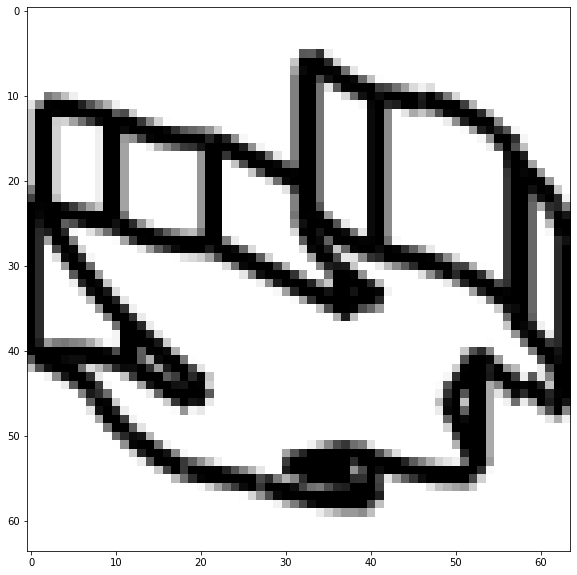

In [42]:
svg2png(url=svg_path, write_to=png_path, output_height=max_h, output_width=max_w)

img = load_png(png_path)
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')

In [52]:
%%time
gen = PVFGenerator()
img, field = gen.generate_vector_field(svg_path)

CPU times: user 2min 20s, sys: 1.72 s, total: 2min 22s
Wall time: 2min 20s


In [5]:
from utils import plot_vector_field

ModuleNotFoundError: No module named 'utils'

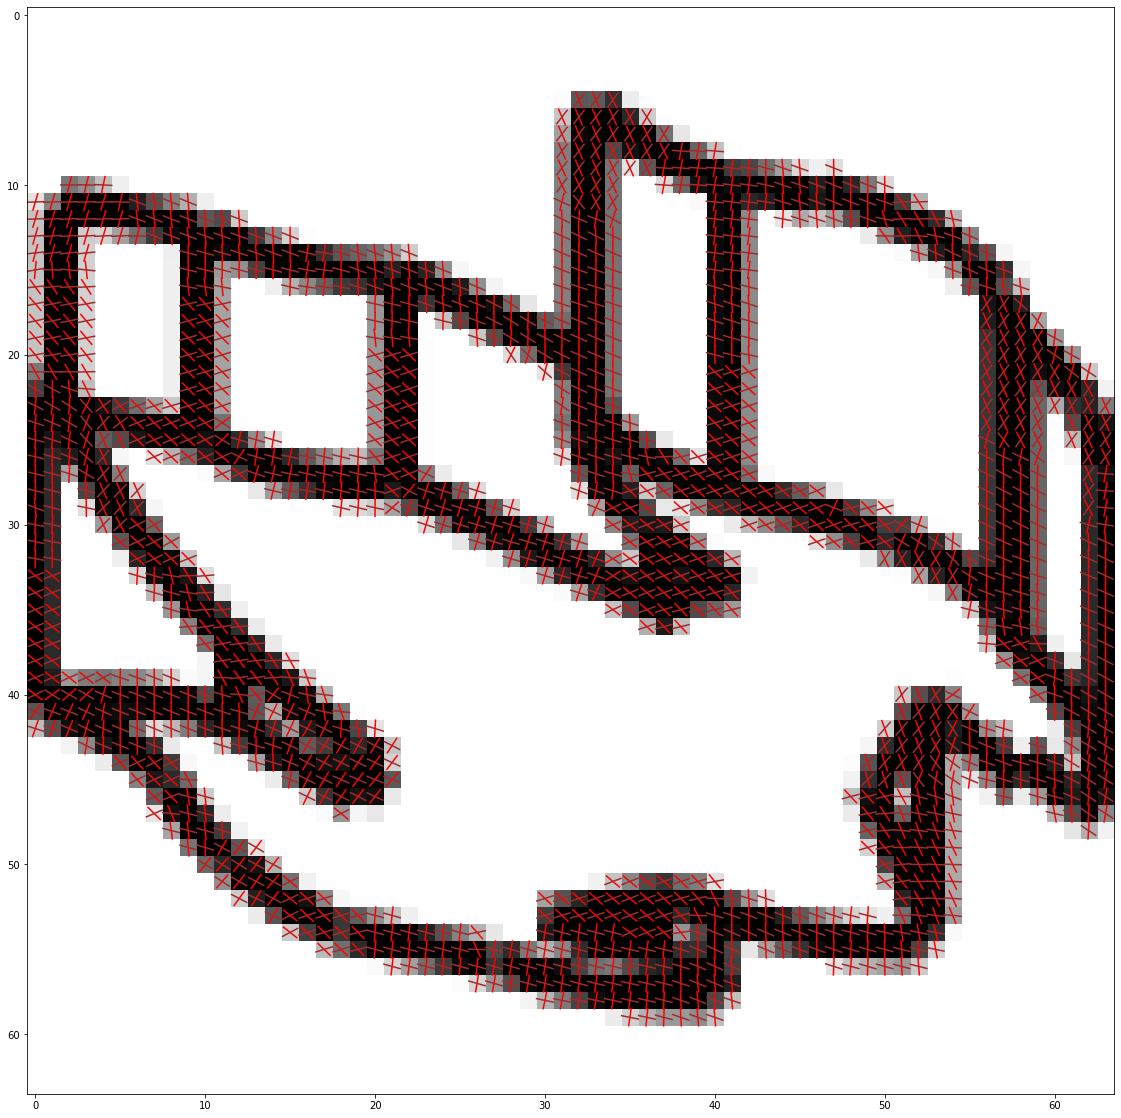

In [54]:
plt.figure(figsize=(20, 20))
plot_vector_field(img, field, normalize=True)

In [ ]:
field[:2] /= (np.linalg.norm(field[:2], axis=0) + 1e-5)
field[2:] /= (np.linalg.norm(field[2:], axis=0) + 1e-5)

In [ ]:
plt.figure(figsize=(20, 20))
plot_vector_field(img, field, normalize=True)